In [5]:

import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.cloud import storage
import yaml
import pickle

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import PercentFormatter
import warnings;
warnings.filterwarnings('ignore')
from scipy import stats as st
import random
import os
from pathlib import Path
from typing import List, Dict
from google.cloud import bigquery
from mlops_pipelines.helpers.bigquery import get_schema_from_query_job, bq_schema_to_dtypes
import seaborn as sns

In [6]:
## Loading Dataset from BQ project

In [7]:

def bq_schema_to_dtypes(bq_schema: List[Dict[str, str]]) -> Dict[str, str]:
    mapping_dict = {
        "STRING": "str",
        "INTEGER": "int",
        "FLOAT": "float",
        "NUMERIC": "float",
        "BIGNUMERIC": "float",
        "BOOLEAN": "bool",
    }
    return {column["name"]: mapping_dict.get(column["type"], "object") for column in bq_schema}
  
client = bigquery.Client(project="prj-vo-aa-p-data-science-exp", location='europe-west2')
  

In [8]:
%%bigquery df
select * from prj-vo-aa-p-data-science-exp.jorquec.O2Extrasdisneydataset

Query complete after 0.00s: 100% 1/1 [00:00<00:00, 763.43query/s] 
Downloading: 100% 36244/36244 [00:01<00:00, 22735.07rows/s]


In [5]:
client = bigquery.Client(project="prj-vo-aa-p-data-science-exp", location='europe-west2')
TRAINING_DATASET_SQL = '''select * from prj-vo-aa-p-data-science-exp.jorquec.O2Extrasdisneydataset'''
training_query_job = client.query(TRAINING_DATASET_SQL)
bq_schema = get_schema_from_query_job(client, training_query_job)

In [6]:

## We make sure the types in the DF are matching the bq schema, we also cast any string to categorical once we load the dataframe
dtypes_dict = bq_schema_to_dtypes(bq_schema)
df = df.astype(dtypes_dict, errors='ignore')

In [7]:
df.shape

(36244, 211)

In [8]:
os. getcwd() 

'/home/jupyter/o2extras'

In [9]:
## Save data set to a pickle file

In [9]:
df.to_pickle('gs://jorquec_bucket/o2extras/o2extradataset3m.pickle')

In [ ]:
##  To load it back again: 
df = pd.read_pickle('gs://jorquec_bucket/o2extras/o2extradataset3m.pickle')

In [10]:
df.head()

,ref_date,CUSTOMER_CAT,usi,cycle,contract_seq_no_adjusted,days_from_ced,contract_start_date,ooc,resign_fanboy_group,channel_l1,...,gender_desc,broadband_provider_email,ave_ncx_l3m,ncx_days_0to20_l3m,ncx_days_20to40_l3m,ncx_days_40to60_l3m,ncx_days_60to80_l3m,ncx_days_80to100_l3m,ncx_score,final_data_allowance
0,2022-12-31,UPGRADE,-971756363,5.0,5.0,-1085,2022-12-21,0,Consistently INC 7m+,Online,...,Female,talktalk,7.884328,14.0,NaN,12.0,96.0,146.0,10.0,5120.0
1,2022-12-31,UPGRADE,-526429411,5.0,5.0,-714,2022-12-15,0,Consistently INC 7m+,Retail,...,Male,virginmedia,8.501887,2.0,NaN,27.0,51.0,185.0,10.0,76800.0
2,2022-12-31,UPGRADE,-999388181,8.0,8.0,-702,2022-12-03,0,Consistently INC 7m+,Online,...,Female,virginmedia,4.857820,84.0,NaN,6.0,75.0,46.0,6.0,10240.0
3,2022-12-31,UPGRADE,-435073083,3.0,3.0,-728,2022-12-29,0,Consistently INC 7m+,Telesales,...,Male,virginmedia,8.382022,2.0,NaN,6.0,95.0,164.0,10.0,153600.0
4,2022-12-31,UPGRADE,-997871312,4.0,4.0,-722,2022-12-23,0,Consistently INC 7m+,Telesales,...,Male,ntlworld,8.896296,NaN,NaN,7.0,60.0,203.0,10.0,76800.0


In [11]:
print(list(df.columns))

['ref_date', 'CUSTOMER_CAT', 'usi', 'cycle', 'contract_seq_no_adjusted', 'days_from_ced', 'contract_start_date', 'ooc', 'resign_fanboy_group', 'channel_l1', 'sim_only_ind', 'mins_allowance', 'term', 'tenure_months', 'days_on_current_imei', 'tenure_desc', 'time_on_handset', 'second_hand_imei_hd', 'age_id_2', 'new_acorn_cat_desc', 'familyplan_flag', 'spend_cap_level', 'contract_type', 'refresh', 'flex_refresh_flag', 'first_recent_channel', 'second_recent_channel', 'third_recent_channel', 'total_cs_mins', 'cs_int_flag', 'digital_int_flag', 'wc_int_flag', 'no_of_comms_3m', 'no_of_comms_6m', 'assisted_effort_dur', 'ecn_sent_flag_l1m', 'o2_wifi_days_last_30', 'o2_wifi_days_last_90', 'wifi', 'device_fanboy_group', 'subs', 'offering_subs_rev_inc_vat_amt', 'pac_request_l1m', 'credit_band', 'o2_travel_iz_flag', 'o2_travel_row_flag', 'multiple_mpn_flag', 'os_desc', 'device_os', 'iphone', 'vendor_desc_2', 'is_o25g_ind', 'hs_flag', 'simo_flag', 'total_isrl_browsing_time_l3m', 'isrl_browsing_time_ca

In [12]:
n = len(df)

In [13]:
print(f'Sample size, n = {n}')

Sample size, n = 36244


In [14]:
df['utilisation'].dtype

dtype('float64')

In [15]:
df['target'].value_counts()

0    34259
1     1985
Name: target, dtype: int64

In [16]:
df[['target']].value_counts(normalize=True).reset_index(name='count')

,target,count
0,0,0.945232
1,1,0.054768


In [17]:
pd.value_counts(df['domestic_voice_duration'],dropna=False)

0.00      6997
NaN       2180
0.03        75
0.05        62
0.07        59
          ... 
113.23       1
381.04       1
11.56        1
587.66       1
30.31        1
Name: domestic_voice_duration, Length: 18088, dtype: int64

In [18]:
pd.value_counts(df['plan_cca_ind'],dropna=False)

0    23779
1    12465
Name: plan_cca_ind, dtype: int64

(-2000.0, 1000.0)

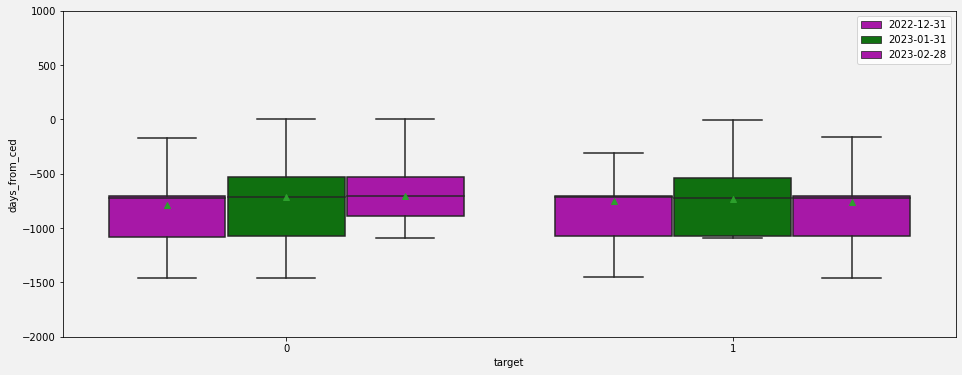

In [19]:
# Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="target", y="days_from_ced",
            hue="load_date", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['target','load_date'])['days_from_ced'].median()
vertical_offset = df['days_from_ced'].median() * 0.05 # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(-2000,1000)
#g.despine(offset=10, trim=True)
 

(-80.0, 50.0)

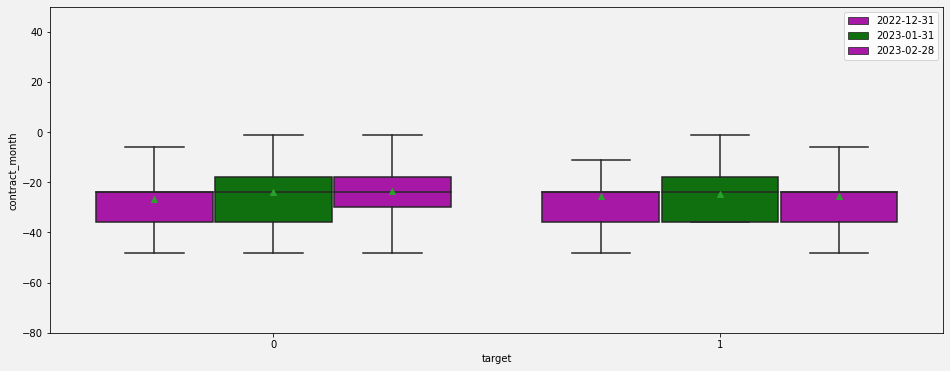

In [20]:
# Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="target", y="contract_month",
            hue="load_date", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['target','load_date'])['contract_month'].median()
vertical_offset = df['contract_month'].median() * 0.05 # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(-80,50)
#g.despine(offset=10, trim=True)
 

(0.0, 50.0)

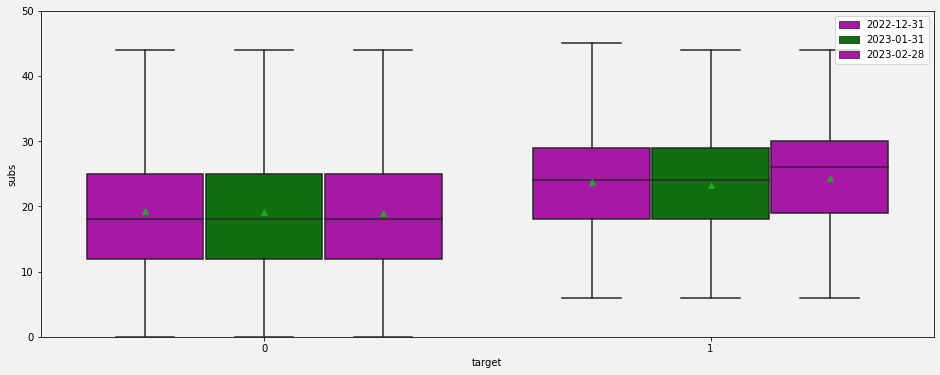

In [22]:
# Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="target", y="subs",
            hue="load_date", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['target','load_date'])['subs'].median()
vertical_offset = df['subs'].median() * 0.05 # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(0,50)
#g.despine(offset=10, trim=True)

(-2.0, 100.0)

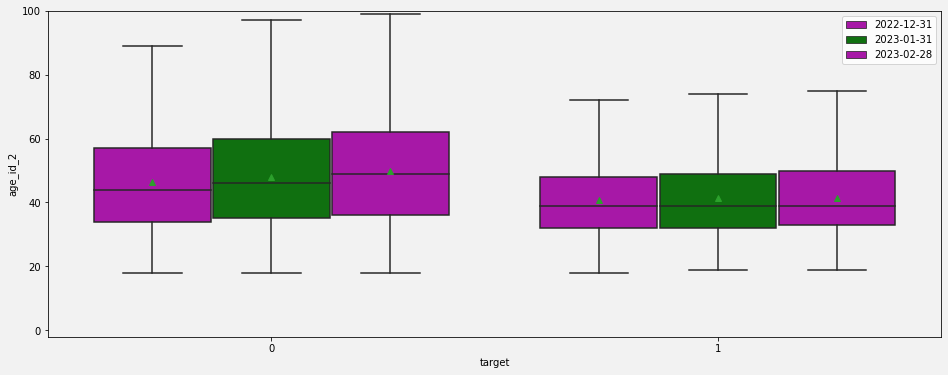

In [23]:
# Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="target", y="age_id_2",
            hue="load_date", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['target','load_date'])['age_id_2'].median()
vertical_offset = df['age_id_2'].median() * 0.05 # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(-2,100)
#g.despine(offset=10, trim=True)

(-2.0, 80.0)

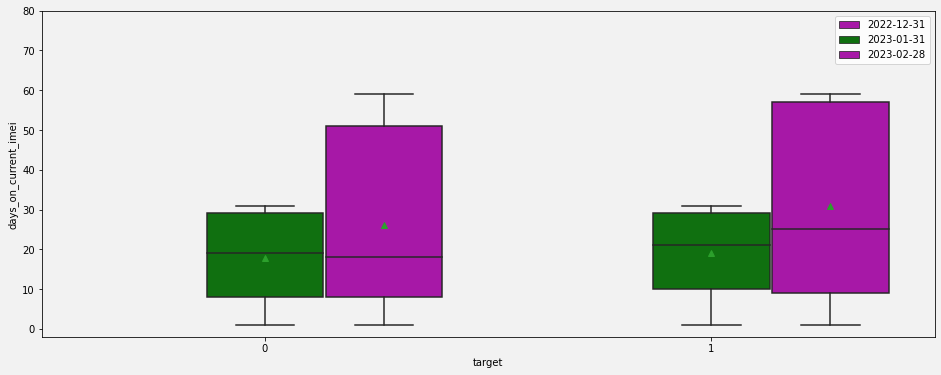

In [24]:
# table `prj-vo-p-data-cldphub-01.vodata_cdm_curated.imei_used_track` started on 2022-12-31, so no data for DEC 22

# Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="target", y="days_on_current_imei",
            hue="load_date", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['target','load_date'])['days_on_current_imei'].median()
vertical_offset = df['days_on_current_imei'].median() * 0.05 # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(-2,80)
#g.despine(offset=10, trim=True)

(1024.0, 350000.0)

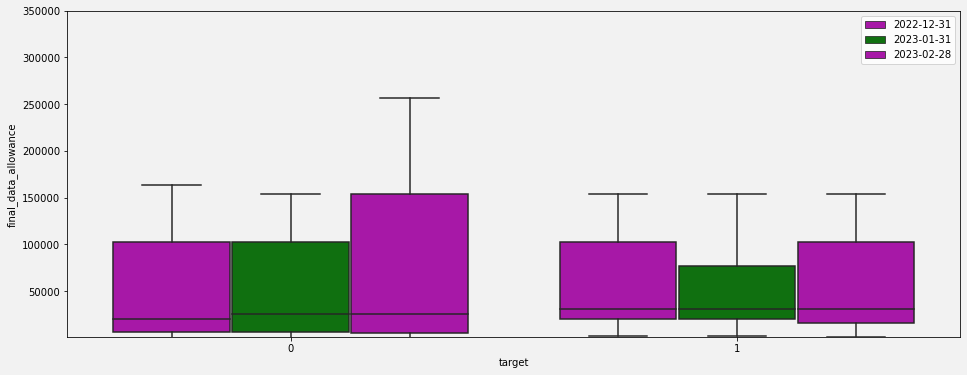

In [32]:

# Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="target", y="final_data_allowance",
            hue="load_date", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['target','load_date'])['final_data_allowance'].median()
vertical_offset = df['final_data_allowance'].median() * 0.05 # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(1024,350000)
#g.despine(offset=10, trim=True)

(1024.0, 350000.0)

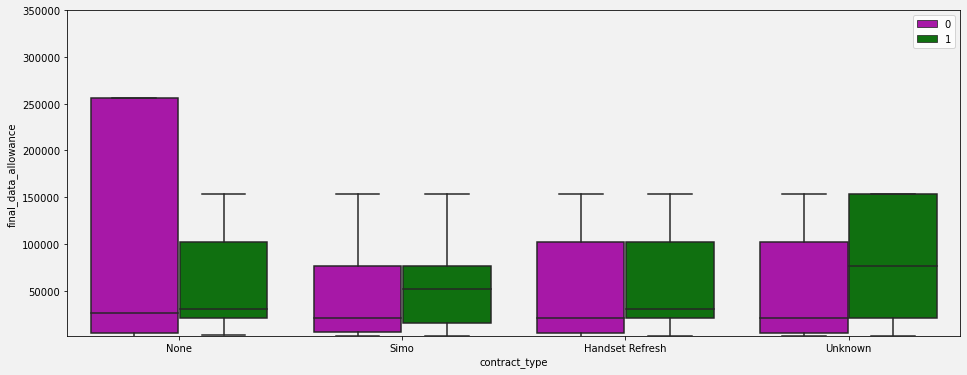

In [31]:
#contract type, target and final_data_allowance 
#Draw a nested boxplot 
fig = plt.figure(figsize = (16,6),facecolor= '#F2F2F2')
ax = fig.add_subplot(111)
ax.set_facecolor('#F2F2F2')
 
#fig.set_facecolor('#F2F2F2')
g=sns.boxplot(x="contract_type", y="final_data_allowance",
            hue="target", palette=["m", "g"],
            data=df,
            showfliers = False,
            showmeans= True
            )
medians = df.groupby(['contract_type', 'target'])['final_data_allowance'].median()
vertical_offset = df['final_data_allowance'].median()* 0.05  # offset from median for display
 
#for xtick in g.get_xticks():
#    g.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
#            horizontalalignment='center',size='x-small',color='w',weight='semibold')
 
plt.legend(loc='upper right')
#plt.show()
g.set_ylim(1024,350000)
#g.despine(offset=10, trim=True)

In [29]:
  print(df['ref_date'].value_counts(dropna=False))

2023-02-28    17217
2023-01-31    11894
2022-12-31     7133
Name: ref_date, dtype: int64


In [30]:
  print(df['load_date'].value_counts(dropna=False))

2023-02-28    17217
2023-01-31    11894
2022-12-31     7133
Name: load_date, dtype: int64
